In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### LOAD DATA

In [2]:
df = pd.read_csv('/content/marketing_campaign.csv',sep=';')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Mengecek Jumlah nilai Kosong
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [6]:
# Hapus baris dengan nilai kosong pada kolom 'Income'
df = df.dropna(subset=['Income']).reset_index(drop=True)

In [7]:
# Mengecek data duplikat
duplicates = df.duplicated().sum()
print(f'Duplicate Rows: {duplicates}')

Duplicate Rows: 0


***Korelasi***

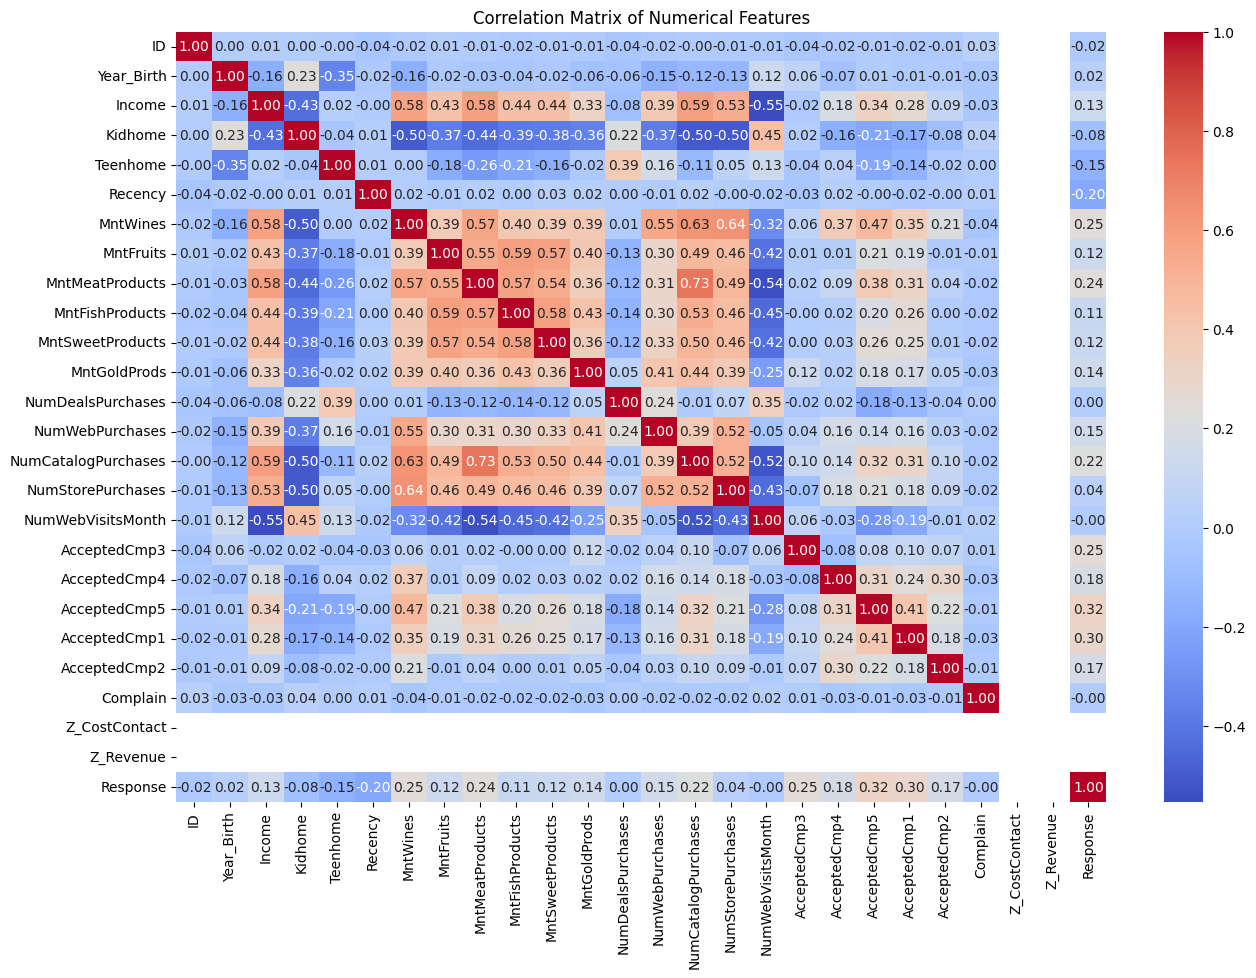

In [8]:
num_cols = df.select_dtypes(include='number')  # ambil semua kolom numerik
corr_matrix = num_cols.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [9]:
print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [10]:
# Encoding kolom Education
df['Education'] = df['Education'].replace({
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
})

# Encoding kolom Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Single': 0,
    'Together': 1,
    'Married': 2,
    'Divorced': 3,
    'Widow': 4,
    'Alone': 5,
    'Absurd': 6,
    'YOLO': 7
})

<ipython-input-10-582317860>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace({
<ipython-input-10-582317860>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marital_Status'] = df['Marital_Status'].replace({


### Feature Engineering

In [11]:
df['Age'] = 2021 - df['Year_Birth']

### Clustering

In [12]:
features = [
    'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Complain', 'Response']

X = df[features].values

In [13]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_std = standardize(X)

In [14]:
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [15]:
def kmeans(data, k, max_iter=100):
    # Step 1: Inisialisasi centroid secara acak
    np.random.seed(42)
    centroids = data[np.random.choice(len(data), k, replace=False)]

    for _ in range(max_iter):
        # Step 2: Assign cluster
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        # Step 3: Update centroid
        new_centroids = []
        for cluster in clusters:
            if cluster:  # hindari cluster kosong
                new_centroid = np.mean(cluster, axis=0)
            else:
                # kalau cluster kosong, random lagi centroid
                new_centroid = data[np.random.choice(len(data))]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # Cek konvergen
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    # Assign label akhir
    final_labels = []
    for point in data:
        distances = [euclidean(point, centroid) for centroid in centroids]
        final_labels.append(np.argmin(distances))

    return final_labels, centroids

In [16]:
k = 4
labels, centroids = kmeans(X_std, k)
df['Cluster'] = labels

In [17]:
# 5. Dapatkan kembali nilai asli dari centroid
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
centroids_original = centroids * std + mean

# Ambil kolom Age dan Income dari centroid
idx_age = features.index('Age')
idx_income = features.index('Income')
centroid_age = centroids_original[:, idx_age]
centroid_income = centroids_original[:, idx_income]


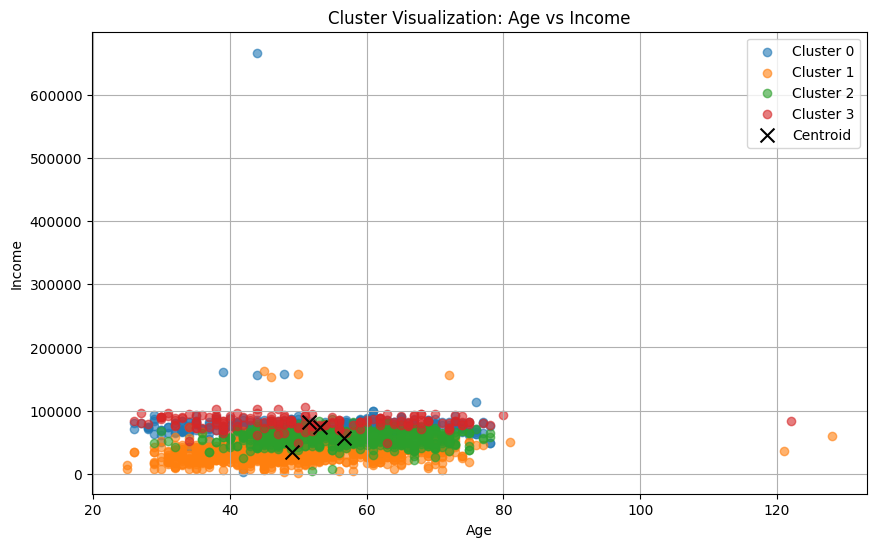

In [18]:
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Income'], label=f'Cluster {cluster}', alpha=0.6)

# Tambahkan centroid ke plot
plt.scatter(centroid_age, centroid_income, color='black', marker='x', s=100, label='Centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Cluster Visualization: Age vs Income')
plt.legend()
plt.grid(True)
plt.show()

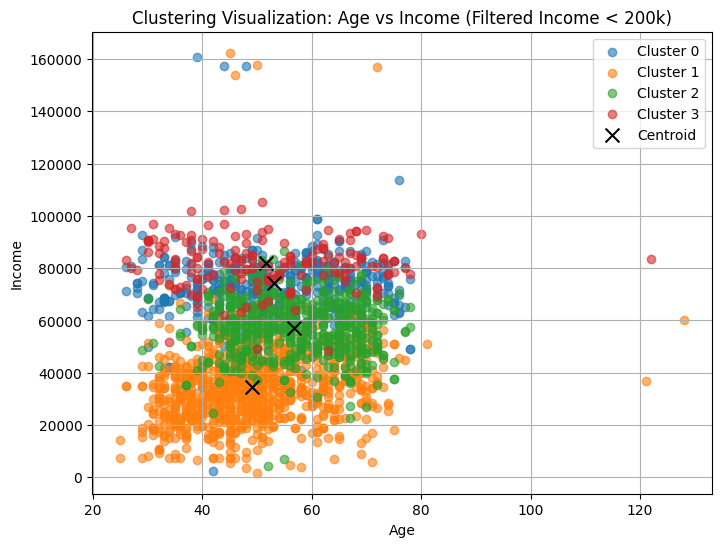

In [19]:
plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    plt.scatter(
        df[(df['Cluster'] == cluster_id) & (df['Income'] < 200000)]['Age'],
        df[(df['Cluster'] == cluster_id) & (df['Income'] < 200000)]['Income'],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )
# Tambahkan centroid ke plot
plt.scatter(centroid_age, centroid_income, color='black', marker='x', s=100, label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clustering Visualization: Age vs Income (Filtered Income < 200k)')
plt.legend()
plt.grid(True)
plt.show()

***SILHOUTTE***

In [20]:
def compute_sse(X, labels, centroids):
    labels = np.array(labels)
    return sum(np.sum((X[labels == i] - centroids[i])**2) for i in range(len(centroids)))

# Silhouette Score manual
def silhouette_score(X, labels):
    labels = np.array(labels)
    n = len(X)
    scores = []
    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == j] for j in set(labels) if j != labels[i]]
        a = np.mean(np.linalg.norm(X[i] - same_cluster, axis=1))
        b = np.min([np.mean(np.linalg.norm(X[i] - cluster, axis=1)) for cluster in other_clusters])
        scores.append((b - a) / max(a, b))
    return np.mean(scores)

In [21]:
sse_list = []
silhouette_list = []
k_list = list(range(2, 7))

for k in k_list:
    labels, centroids = kmeans(X_std, k)
    sse = compute_sse(X_std, labels, centroids)
    sil = silhouette_score(X_std, labels)
    sse_list.append(sse)
    silhouette_list.append(sil)
    print(f"K={k} | SSE={sse:.2f} | Silhouette={sil:.4f}")

K=2 | SSE=39670.17 | Silhouette=0.2668
K=3 | SSE=36105.84 | Silhouette=0.1906
K=4 | SSE=33561.31 | Silhouette=0.1950
K=5 | SSE=32163.60 | Silhouette=0.1213
K=6 | SSE=31112.06 | Silhouette=0.1261


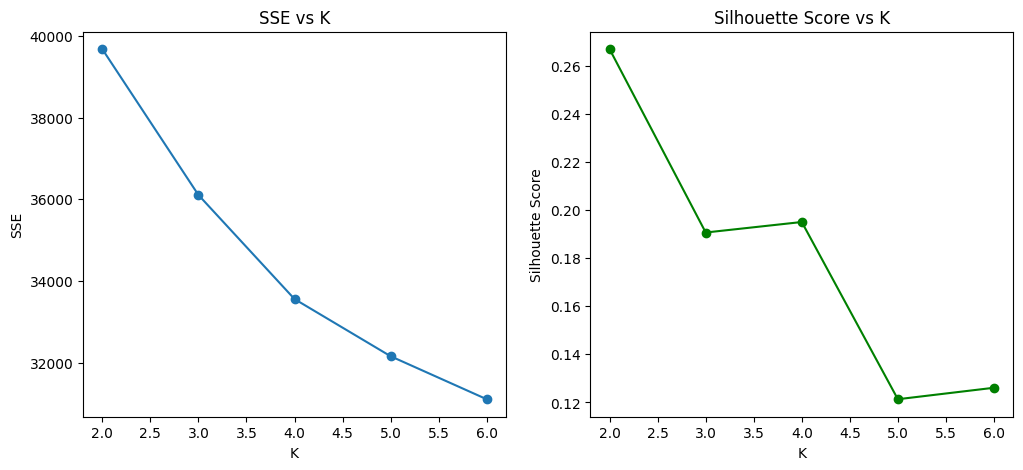

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_list, sse_list, marker='o')
plt.title("SSE vs K")
plt.xlabel("K")
plt.ylabel("SSE")

plt.subplot(1, 2, 2)
plt.plot(k_list, silhouette_list, marker='o', color='green')
plt.title("Silhouette Score vs K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()

### PCA

In [23]:
from sklearn.decomposition import PCA
k = 4
labels, centroids = kmeans(X_std, k)
df['Cluster'] = labels

# Pastikan data sudah distandardisasi: X_std
pca = PCA(n_components=2)  # Ambil 2 komponen utama
X_pca = pca.fit_transform(X_std)  # Proyeksikan data ke ruang PCA
centroids_pca = pca.transform(centroids)

# Jika kamu ingin melihat seberapa besar variasi yang dijelaskan:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance (2 components):", np.sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.28443482 0.08841178]
Total explained variance (2 components): 0.3728465918306779


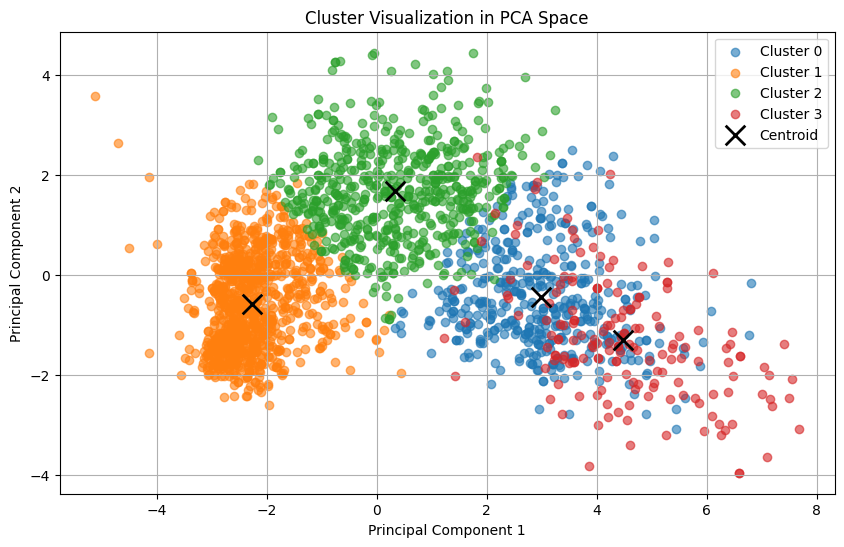

In [24]:
import matplotlib.pyplot as plt

# X_pca: hasil dari pca.fit_transform(X_std)
# centroids_pca: hasil dari pca.transform(centroids)
# labels: hasil clustering dari fungsi kmeans

plt.figure(figsize=(10, 6))
for cluster_id in range(k):
    plt.scatter(
        X_pca[np.array(labels) == cluster_id, 0],  # PC1
        X_pca[np.array(labels) == cluster_id, 1],  # PC2
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )

plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    color='black', marker='x', s=200, linewidths=2, label='Centroid'
)

plt.title('Cluster Visualization in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


### Without Library

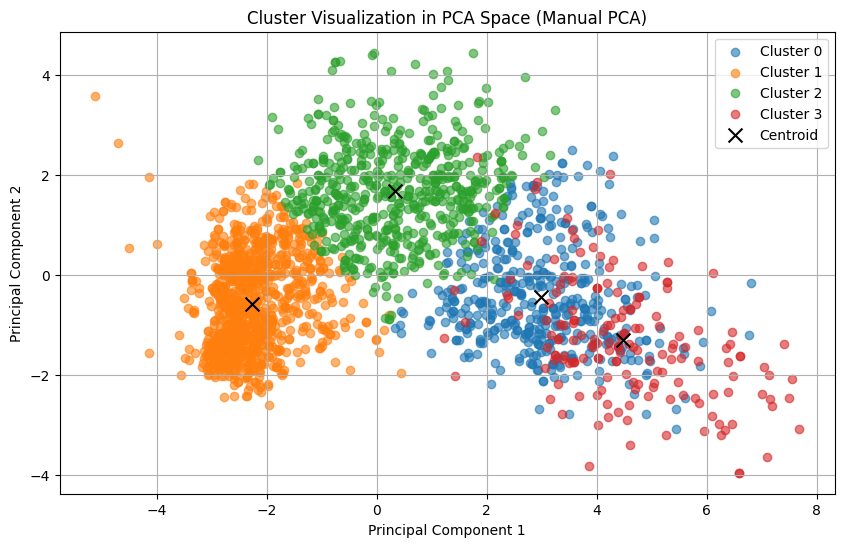

In [25]:
# 1. Standardisasi
X_mean = np.mean(X, axis=0)
X_std_dev = np.std(X, axis=0)
X_std = (X - X_mean) / X_std_dev


# 3. PCA manual via SVD
U, S, Vt = np.linalg.svd(X_std, full_matrices=False)

# 4. Ambil 2 komponen utama (mirip sklearn.PCA(n_components=2))
components = Vt[:2]  # shape: (2, num_features)

# 5. Proyeksikan data ke ruang PCA
X_pca_manual = np.dot(X_std, components.T)  # shape: (n_samples, 2)

# 6. Proyeksikan centroid juga (karena centroid juga berada di space yang distandarkan)
centroids_pca_manual = np.dot(centroids, components.T)

X_pca_manual[:, 0] *= -1           # Balik PC1
centroids_pca_manual[:, 0] *= -1   # Balik juga centroids PC1


# 7. Visualisasi hasilnya
plt.figure(figsize=(10, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for cluster in range(k):
    plt.scatter(
        X_pca_manual[np.array(labels) == cluster, 0],
        X_pca_manual[np.array(labels) == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.6,
        color=colors[cluster]
    )


plt.scatter(centroids_pca_manual[:, 0], centroids_pca_manual[:, 1], color='black', marker='x', s=100, label='Centroid')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization in PCA Space (Manual PCA)')
plt.legend()
plt.grid(True)
plt.show()

***Bobot PCA***

In [28]:
def pca_manual_with_loadings(X, n_components=2):
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar=False)
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat)
    sorted_idx = np.argsort(eig_vals)[::-1]
    eig_vecs = eig_vecs[:, sorted_idx]
    eig_vecs_subset = eig_vecs[:, :n_components]

    return np.dot(X_meaned, eig_vecs_subset), eig_vecs_subset

In [30]:
X_pca, loadings = pca_manual_with_loadings(X_std, n_components=2)

# Cek bobot tiap fitur di PC1 dan PC2
for i, feature in enumerate(features):
    print(f"{feature}: PC1={loadings[i, 0]:.4f}, PC2={loadings[i, 1]:.4f}")

Age: PC1=0.0575, PC2=-0.3402
Income: PC1=0.2915, PC2=-0.0698
Kidhome: PC1=-0.2555, PC2=0.1015
Teenhome: PC1=-0.0568, PC2=-0.5384
Recency: PC1=0.0006, PC2=-0.0406
MntWines: PC1=0.3060, PC2=-0.1583
MntFruits: PC1=0.2662, PC2=0.0930
MntMeatProducts: PC1=0.3143, PC2=0.1237
MntFishProducts: PC1=0.2762, PC2=0.1033
MntSweetProducts: PC1=0.2693, PC2=0.0846
MntGoldProds: PC1=0.2213, PC2=-0.1052
NumDealsPurchases: PC1=-0.0555, PC2=-0.4565
NumWebPurchases: PC1=0.2120, PC2=-0.3573
NumCatalogPurchases: PC1=0.3186, PC2=-0.0156
NumStorePurchases: PC1=0.2827, PC2=-0.2117
NumWebVisitsMonth: PC1=-0.2471, PC2=-0.1604
AcceptedCmp1: PC1=0.1717, PC2=0.1524
AcceptedCmp2: PC1=0.0586, PC2=0.0108
AcceptedCmp3: PC1=0.0201, PC2=0.0952
AcceptedCmp4: PC1=0.0960, PC2=-0.1037
AcceptedCmp5: PC1=0.1924, PC2=0.1808
Complain: PC1=-0.0155, PC2=-0.0005
Response: PC1=0.1081, PC2=0.1302


### Dataset 2

In [ ]:
X = df[['Age', 'Spending Score (1-100)']].values

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def initialize_centroids(X, k):
    np.random.seed(42)  # Supaya hasil konsisten
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        new_centroid = cluster_points.mean(axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

In [ ]:
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, clusters

In [ ]:
import matplotlib.pyplot as plt

k = 5
final_centroids, final_clusters = kmeans(X, k)
plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X[final_clusters == i][:, 0], X[final_clusters == i][:, 1], label=f'Cluster {i}')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', marker='o', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()